## **Black Friday sales Data Analytics**

### **Importing the Libraries**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing,
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt


### **Loading The Dataseat**


In [4]:
df=pd.read_csv("/content/BlackFriday.csv")
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.info


<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]>

In [8]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
# Finding the Percentage of missing values in each column
(df.isna().sum()*100/df.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Percentage of missing values"})


,Percentage of missing values
Product_Category_3,69.672659
Product_Category_2,31.566643
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000


In [11]:
df[["Product_Category_2","Product_Category_3"]] = df[["Product_Category_2","Product_Category_3"]].fillna(0)
#df[["Product_Category_2","Product_Category_3"]] = df[["Product_Category_2","Product_Category_3"]].fillnan(0)


In [12]:
# Finding the Percentage of missing values in each column after replacing the 'NA' values with zero
np.round((df.isna().sum()*100/df.shape[0]),2).sort_values(ascending=False).to_frame().rename(columns={0:"Percentage of missing values"})


,Percentage of missing values
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category_1,0.0
Product_Category_2,0.0


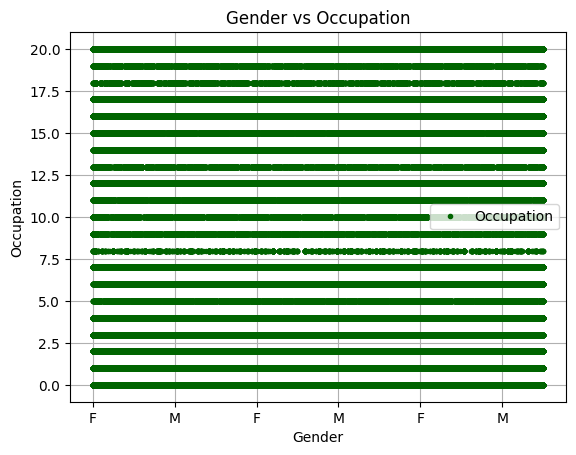

In [13]:
df.plot(x='Gender',y='Occupation',style='.',color='DarkGreen')
plt.title('Gender vs Occupation')
plt.xlabel('Gender')
plt.ylabel('Occupation')
plt.grid()
plt.show()

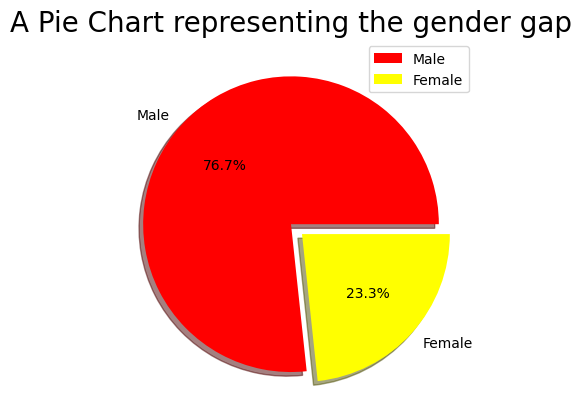

In [15]:
size = [405380, 123197]
labels = ['Male', 'Female']
colors = ['red', 'yellow']
explode = [0, 0.1]
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.1f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()


<ipython-input-21-2d508125f713>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Age'], palette = 'muted')


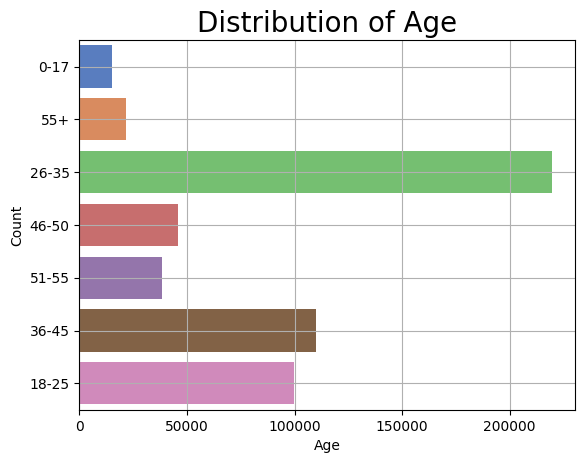

In [21]:
sns.countplot(df['Age'], palette = 'muted')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()


<ipython-input-18-6a477bed1d10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"],color='r')


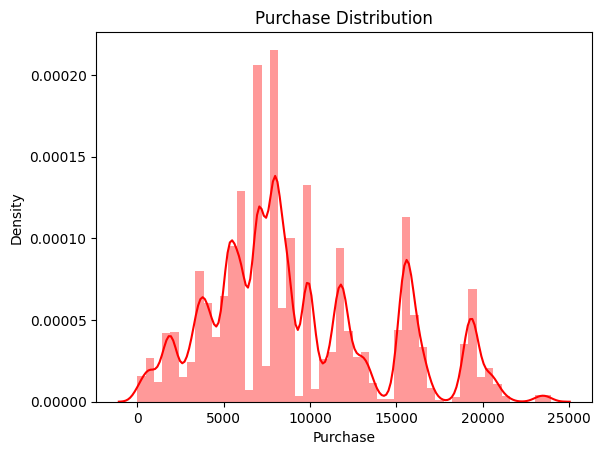

In [18]:
sns.distplot(df["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

**Normalization**

In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Label encoder object
le = LabelEncoder()
df["Age"] = le.fit_transform(df["Age"])
df["Stay_In_Current_City_Years"] = le.fit_transform(df["Stay_In_Current_City_Years"])
df["City_Category"] = le.fit_transform(df["City_Category"])

# dropped unnecessary fields
train_dropped_df = df.drop(['User_ID', 'Product_ID'],axis=1)
print("Dropped the user and product id field")
train_dropped_df = pd.get_dummies(train_dropped_df)
train_dropped_df
X = train_dropped_df.drop(columns= ["Purchase"])

# separate dataframes one is for independant fields and another for dependant field (Target Field)
y = train_dropped_df['Purchase'].values

Dropped the user and product id field


In [32]:
# independent variable
train_dropped_df

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
0,0,10,0,2,0,3,0.0,0.0,8370,1,0
1,0,10,0,2,0,1,6.0,14.0,15200,1,0
2,0,10,0,2,0,12,0.0,0.0,1422,1,0
3,0,10,0,2,0,12,14.0,0.0,1057,1,0
4,6,16,2,4,0,8,0.0,0.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,5,13,1,1,1,20,0.0,0.0,368,0,1
550064,2,1,2,3,0,20,0.0,0.0,371,1,0
550065,2,15,1,4,1,20,0.0,0.0,137,1,0
550066,6,1,2,2,0,20,0.0,0.0,365,1,0


In [68]:
# Target variable --> Purchase
y

array([ 8370, 15200,  1422, ...,   137,   365,   490])

**Correlation Matrix**

In [33]:
corr = df.corr()
corr

<ipython-input-33-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,User_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004716
Age,0.032698,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839
Occupation,-0.023971,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833
City_Category,0.022859,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.061914
Stay_In_Current_City_Years,-0.030737,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422
Marital_Status,0.020443,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,0.003825,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,0.003896,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.003605,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.004716,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000


<Axes: >

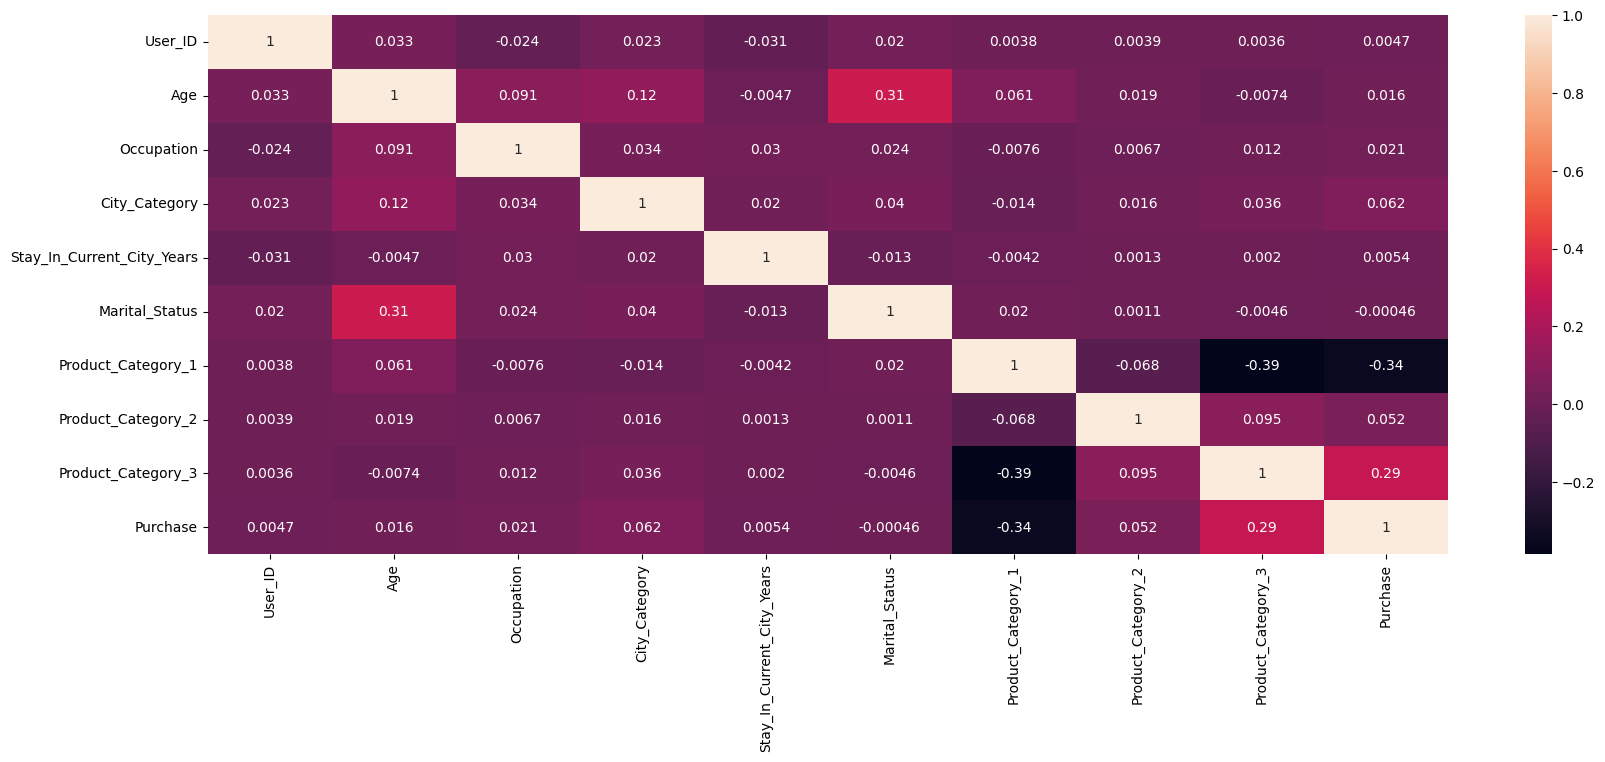

In [35]:
plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True)

### **Splitting the Data**

In [34]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
def train_and_evaluate(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Score method gives the R2 score actually, so we can directly check the R2 score
    print("Train R-2 Score -> {}".format(r2_score(y_train, y_pred_train)))
    print("Test R-2 Score -> {}".format(r2_score(y_test,y_pred_test)))
    print()
    print()
    print("Train RMSE -> {}".format(sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE -> {}".format(sqrt(mean_squared_error(y_test,y_pred_test))))
    return model

### **Model Evaluation**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt


### **Linear Regression**

In [45]:
# Linear Regression
lr = LinearRegression(n_jobs=-1)
#lr = make_pipeline(imputer, LinearRegression(n_jobs=-1))
train_and_evaluate(lr,X_train,y_train,X_test,y_test)


Train R-2 Score -> 0.1530319738650423
Test R-2 Score -> 0.1502225848000539


Train RMSE -> 4623.897758674754
Test RMSE -> 4627.777465694635


LinearRegression(n_jobs=-1)

In [46]:
print('Intercept of the curve is:',lr.intercept_)
print('Slope of the curve is:',lr.coef_)


Intercept of the curve is: 9773.276653045243
Slope of the curve is: [ 103.05285972    5.38420991  317.25958078    7.15358427  -53.89301342
 -350.2205068    13.38930943  143.43588152 -233.05260564  233.05260564]


In [55]:
lr_y_pred=lr.predict(X_test)
lr_y_pred

array([13251.40567643, 12378.61533966,  7208.87236874, ...,
       10714.59997633, 11973.37587951,  8704.22958912])

In [56]:
df=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value': lr_y_pred.flatten()})
df


,Actual Value,Predicted Value
0,19142,13251.405676
1,15513,12378.615340
2,7802,7208.872369
3,15455,12297.972950
4,4492,10748.944078
...,...,...
165016,1840,9333.715419
165017,4050,8374.256819
165018,11836,10714.599976
165019,9548,11973.375880


### **Random Forest Algorithm**

Train R-2 Score -> 0.7972082350675123
Test R-2 Score -> 0.6272879831836825


Train RMSE -> 2262.5587880904395
Test RMSE -> 3064.831286730865


<Axes: title={'center': 'Feature Importance'}>

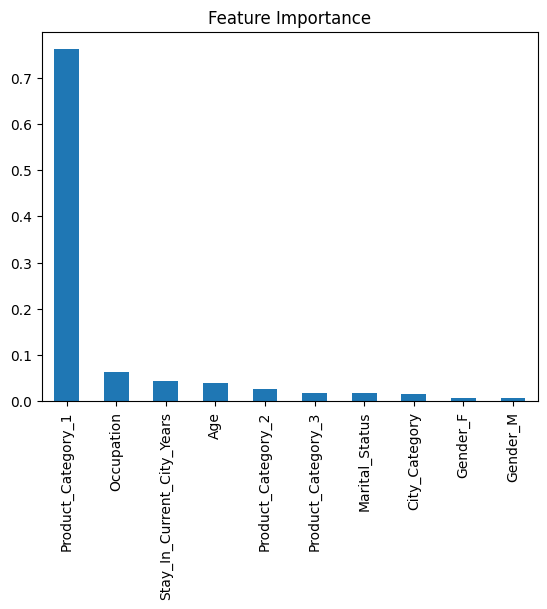

In [57]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(n_jobs=-1)
train_and_evaluate(RFreg,X_train,y_train,X_test,y_test)
features = pd.Series(RFreg.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')



In [58]:
RFreg_y_pred=RFreg.predict(X_test)
RFreg_y_pred

array([13576.9767619 , 13987.89276328,  6742.6999982 , ...,
       13521.68182143, 14570.83501948,  6096.15876895])

In [59]:
df=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value': RFreg_y_pred.flatten()})
df

,Actual Value,Predicted Value
0,19142,13576.976762
1,15513,13987.892763
2,7802,6742.699998
3,15455,14144.161984
4,4492,15311.398560
...,...,...
165016,1840,3837.195500
165017,4050,6424.671770
165018,11836,13521.681821
165019,9548,14570.835019


### **Decision Tree Regressor**

Train R-2 Score -> 0.8091689572012685
Test R-2 Score -> 0.5471290143042067


Train RMSE -> 2194.8216049627636
Test RMSE -> 3378.3693121293154


<Axes: title={'center': 'Feature Importance'}>

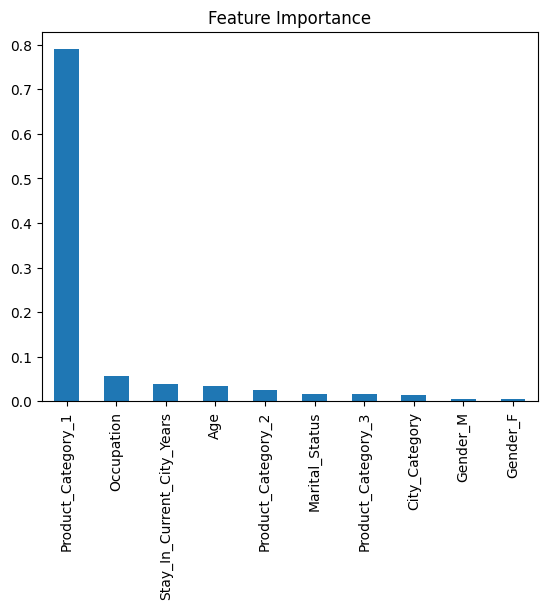

In [65]:
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor()
train_and_evaluate(DTreg,X_train,y_train,X_test,y_test)
features = pd.Series(DTreg.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')


In [66]:
DTreg_y_pred=DTreg.predict(X_test)
DTreg_y_pred

array([15806.        , 19245.        ,  5670.        , ...,
       13750.5       , 14421.8       ,  6100.70031546])

In [67]:
df=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value': DTreg_y_pred.flatten()})
df

,Actual Value,Predicted Value
0,19142,15806.000000
1,15513,19245.000000
2,7802,5670.000000
3,15455,14158.000000
4,4492,15118.000000
...,...,...
165016,1840,1829.000000
165017,4050,6341.166667
165018,11836,13750.500000
165019,9548,14421.800000


### **XGBoost Regressor**

Train R-2 Score -> 0.690103208325716
Test R-2 Score -> 0.6693385641027001


Train RMSE -> 2796.9406753554504
Test RMSE -> 2886.7664442611513


<Axes: title={'center': 'Feature Importance'}>

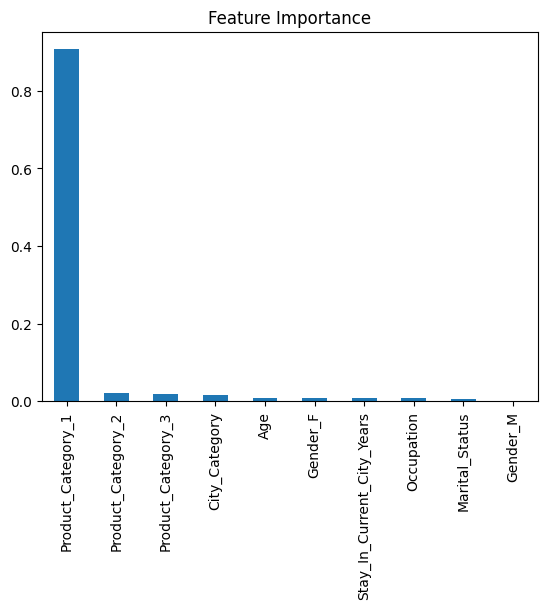

In [54]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
train_and_evaluate(xgb_reg,X_train,y_train,X_test,y_test)
features = pd.Series(xgb_reg.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')



In [62]:
xgb_reg_y_pred=lr.predict(X_test)
xgb_reg_y_pred

array([13251.40567643, 12378.61533966,  7208.87236874, ...,
       10714.59997633, 11973.37587951,  8704.22958912])

In [63]:
df=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value': xgb_reg_y_pred.flatten()})
df

,Actual Value,Predicted Value
0,19142,13251.405676
1,15513,12378.615340
2,7802,7208.872369
3,15455,12297.972950
4,4492,10748.944078
...,...,...
165016,1840,9333.715419
165017,4050,8374.256819
165018,11836,10714.599976
165019,9548,11973.375880


**The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2886.7664442611513**